<a href="https://colab.research.google.com/github/Ankush073/stock_price_prediction_using_LSTM/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 AAPLE Stock Price Analysis: 2020-2024

## Using `yfinance`:  yahoo Finance API wrapper for fetching real-time stock data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

### Data Collection Function
Downloads historical stock data using Yahoo Finance API. Returns adjusted closing prices for specified date range.


In [2]:
# Download stock price data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date,auto_adjust=False)
    return stock_data['Adj Close']


### Data Preprocessing Function
Transforms time series data into sequences for predictive modeling using a sliding window approach.

### Parameters:
- `data`: Pandas Series of stock prices
- `sequence_length`: Number of time steps to use for prediction (window size)


In [3]:
# Preprocess data and create input sequences
def preprocess_data(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):  # loop until len(data) - sequence_length
        sequence = data.iloc[i:i+sequence_length].values  # Use iloc for proper row slicing
        target = data.iloc[i+sequence_length].values  # Make sure to access the next row after the sequence
        sequences.append((sequence, target))
    return sequences


### Data Splitting Function
Splits sequence data into training and testing sets while preserving temporal order.

### Parameters:
- `data`: Preprocessed sequence data
- `test_size`: Fraction of data to use for testing (default: 20%)

Note: `shuffle=False` maintains chronological order, crucial for time series prediction

In [4]:
# Split data into training and testing sets
def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data


### Model Training Function
Trains a linear regression model to predict stock prices based on historical sequences.

### Parameters:
- `X_train`: Training features (sequence of historical prices)
- `y_train`: Training targets (next price to predict)


In [5]:
# Train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

### Model Evaluation Function
Evaluates model performance using Mean Squared Error (MSE) metric.

### Parameters:
- `model`: Trained LinearRegression model
- `X_test`: Test features (sequence of historical prices)
- `y_test`: Actual test values to compare against predictions

In [6]:
# Evaluate model on test data
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

### 🚀 What Are We Doing?
1. **Fetch**: Real-time stock data for **Apple (AAPL)** from **Jan 2020** to **Feb 2024** using the power of `yfinance`.
2. **Visualize**: Bring the data to life with a sleek time-series plot of **Adjusted Close Prices**.  

### ✨ Why It Matters
See Apple’s journey over four years—volatility, trends, and insights all in one graph. 🔍  


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088295  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662720  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320961  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484329  75.797501  76.110001  74.290001  74.290001  132079200


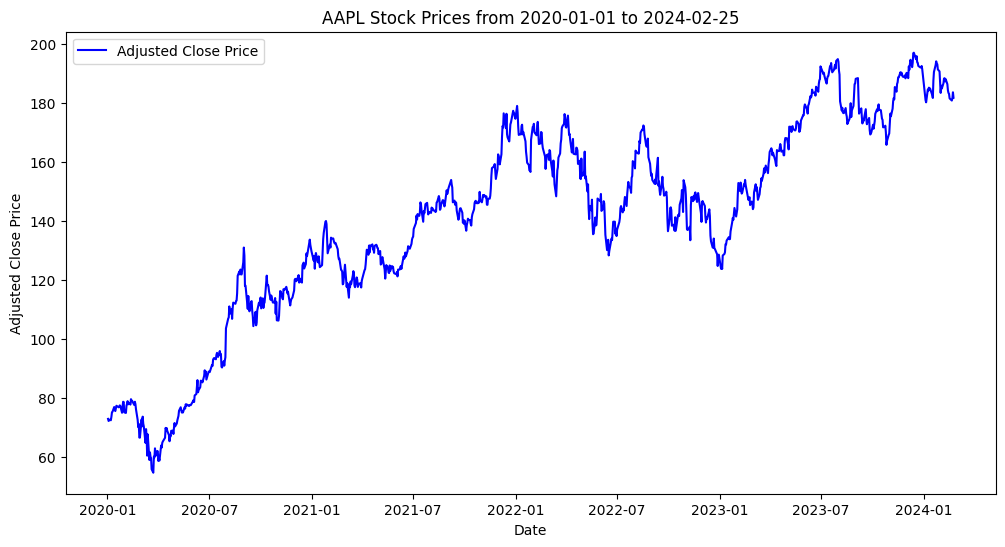

In [7]:
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-02-25'
stock_data = yf.download(ticker, start=start_date, end=end_date,auto_adjust=False)

# Display the first few rows of the DataFrame
print(stock_data.head())

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title(f'{ticker} Stock Prices from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### 🛠️ Clean Up Column Names
- Makes column names easier to access and work with in your analysis.
- Ensures compatibility for future operations or visualizations.


In [8]:
stock_data.columns = stock_data.columns.droplevel('Ticker')

In [9]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484329,75.797501,76.110001,74.290001,74.290001,132079200


In [10]:
stock_data.columns.names=[None]

In [11]:
stock_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484329,75.797501,76.110001,74.290001,74.290001,132079200


### Stock Volume Visualization 📊
- Visualizing how active the stock market is on any given day. 📅



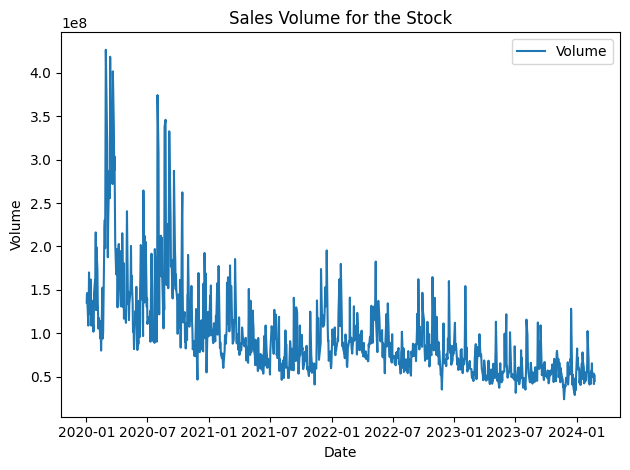

In [12]:
plt.plot(stock_data['Volume'], label='Volume')

# Add labels and title
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Sales Volume for the Stock')

# Show legend and layout
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

### Historical Closing Price Plot

Visualizing the Adjusted Closing Price over time with proper axis labels, title, and a clear legend for easy analysis of stock trends.


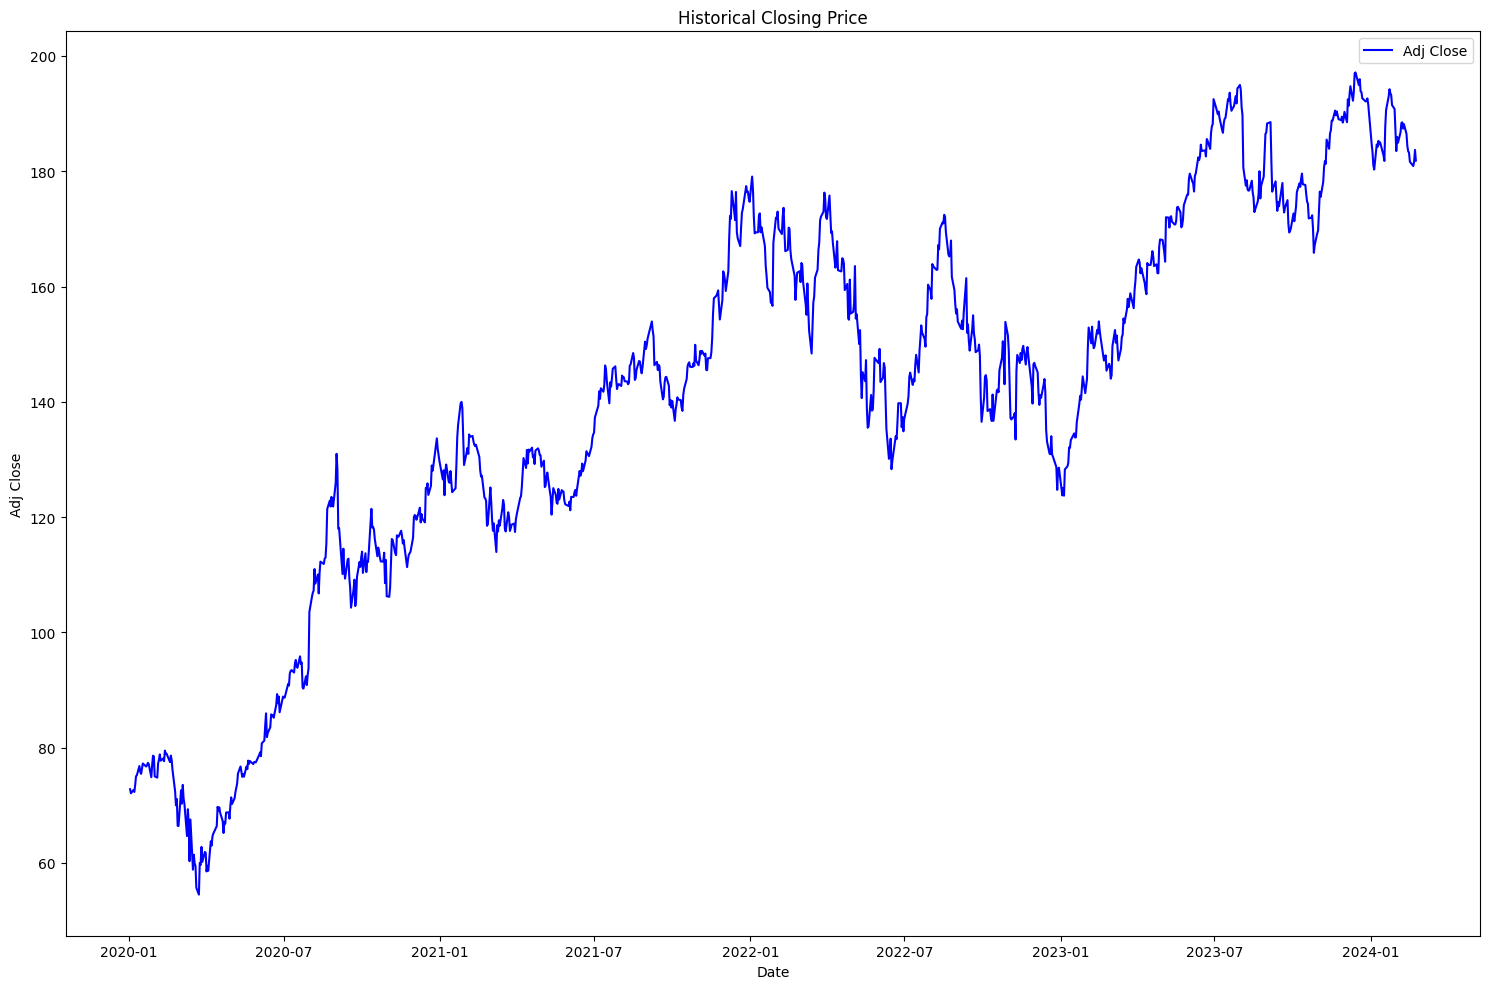

In [13]:
# Set up the figure size
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot the adjusted closing price
plt.plot(stock_data['Adj Close'], label='Adj Close', color='blue')

# Add labels and title
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title('Historical Closing Price')

# Add a legend and layout adjustments
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

### 📊 Moving Averages Visualized  
Effortlessly track trends with *adjusted close prices* alongside **10, 20, and 50-day moving averages**.  
🌟


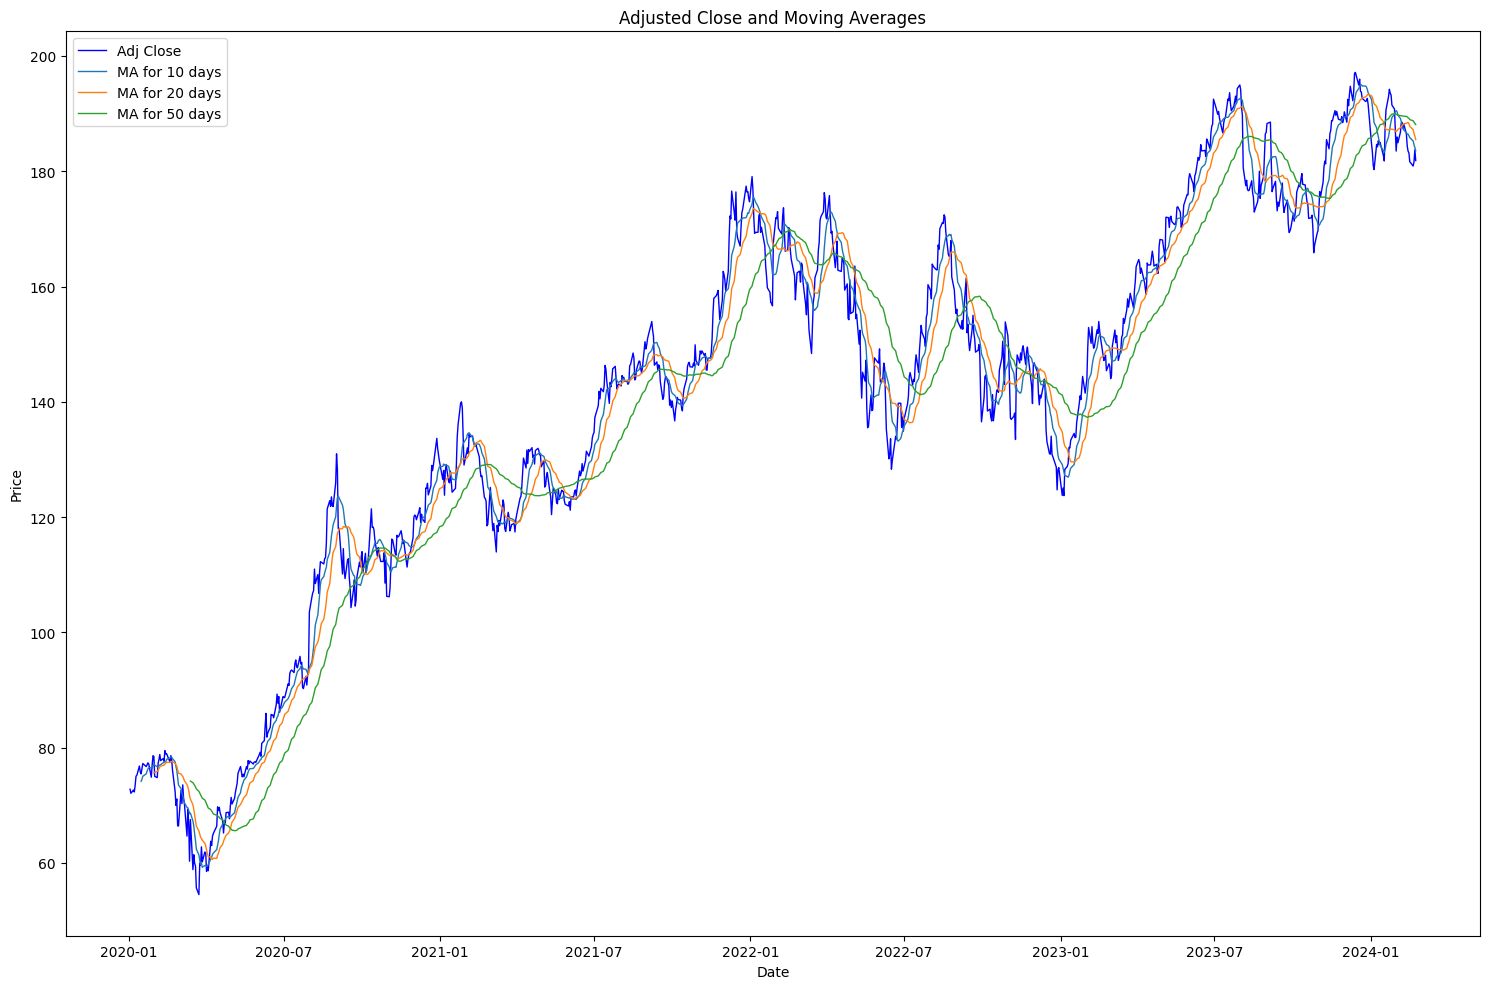

In [14]:


# Define the moving average periods
ma_day = [10, 20, 50]

# Calculate moving averages and add them as new columns in the DataFrame
for ma in ma_day:
    column_name = f"MA for {ma} days"
    stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()

# Create the plot
plt.figure(figsize=(15, 10))

# Plot the adjusted close price and moving averages
plt.plot(stock_data['Adj Close'], label='Adj Close', color='blue', linewidth=1)
for ma in ma_day:
    plt.plot(stock_data[f"MA for {ma} days"], label=f"MA for {ma} days", linewidth=1)

# Add labels, title, and legend
plt.title('Adjusted Close and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 📈 Daily Return Percentage Analysis  
Visualize daily return fluctuations with an engaging plot using **percentage changes** in adjusted close prices.  
📊✨


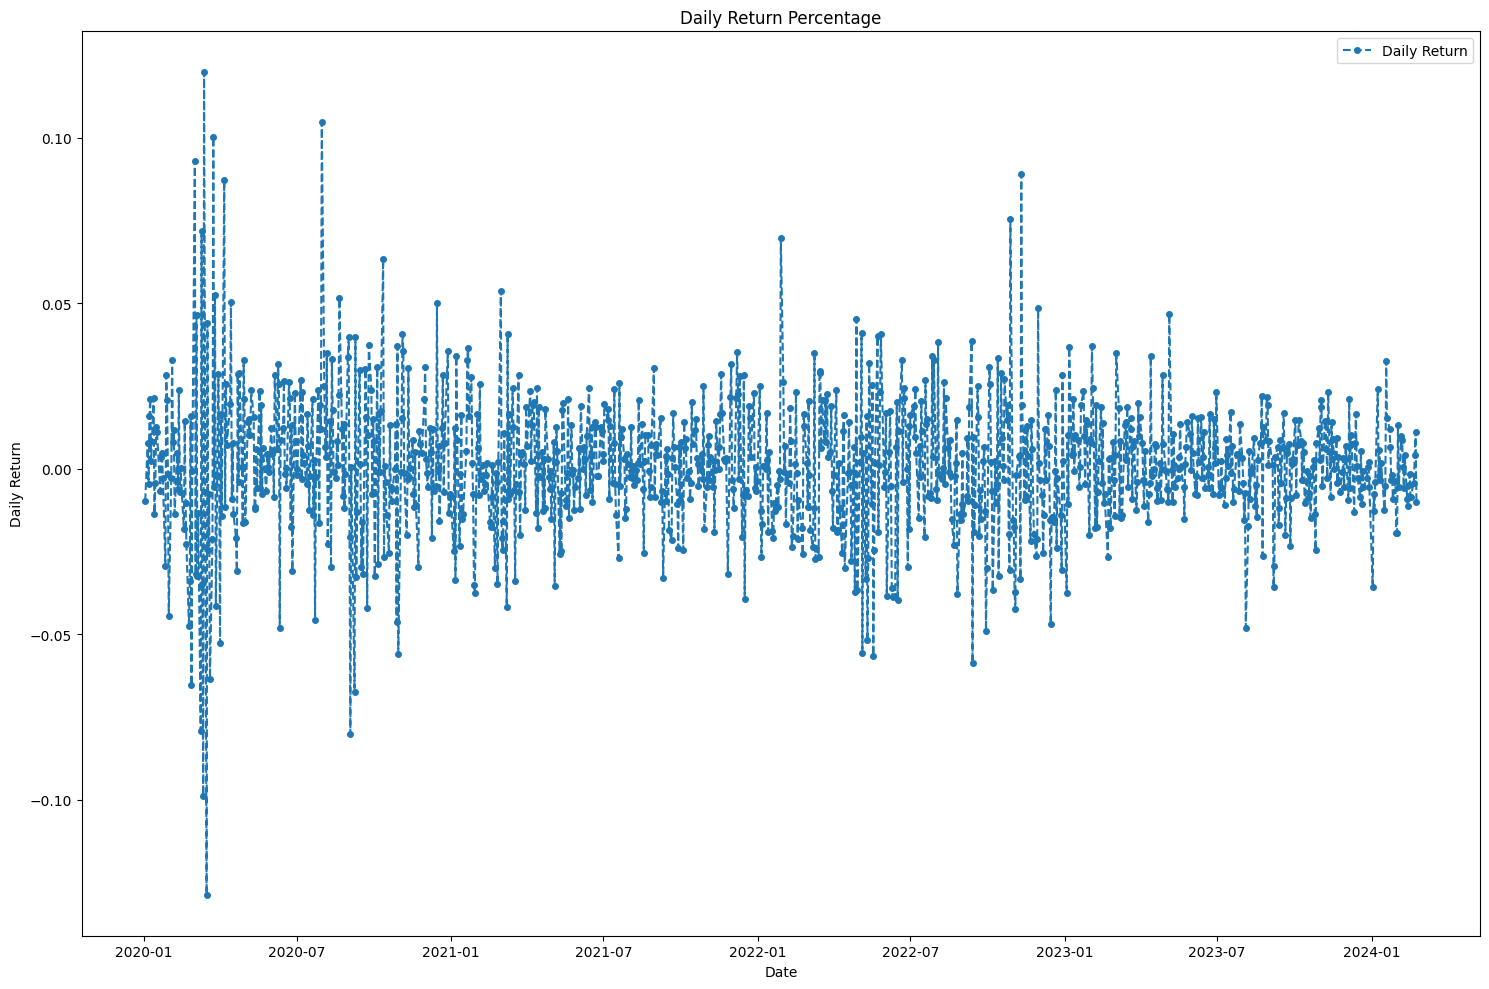

In [15]:
# Calculate the daily return percentage
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Create a plot
plt.figure(figsize=(15, 10))

# Plot the daily return
plt.plot(stock_data['Daily Return'], label='Daily Return', linestyle='--', marker='o', markersize=4)

# Add title and labels
plt.title('Daily Return Percentage')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Add a legend and layout adjustments
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

### 📊 Daily Returns Histogram  
Dive into the distribution of **daily returns** with a visually compelling histogram.  
📉📈  


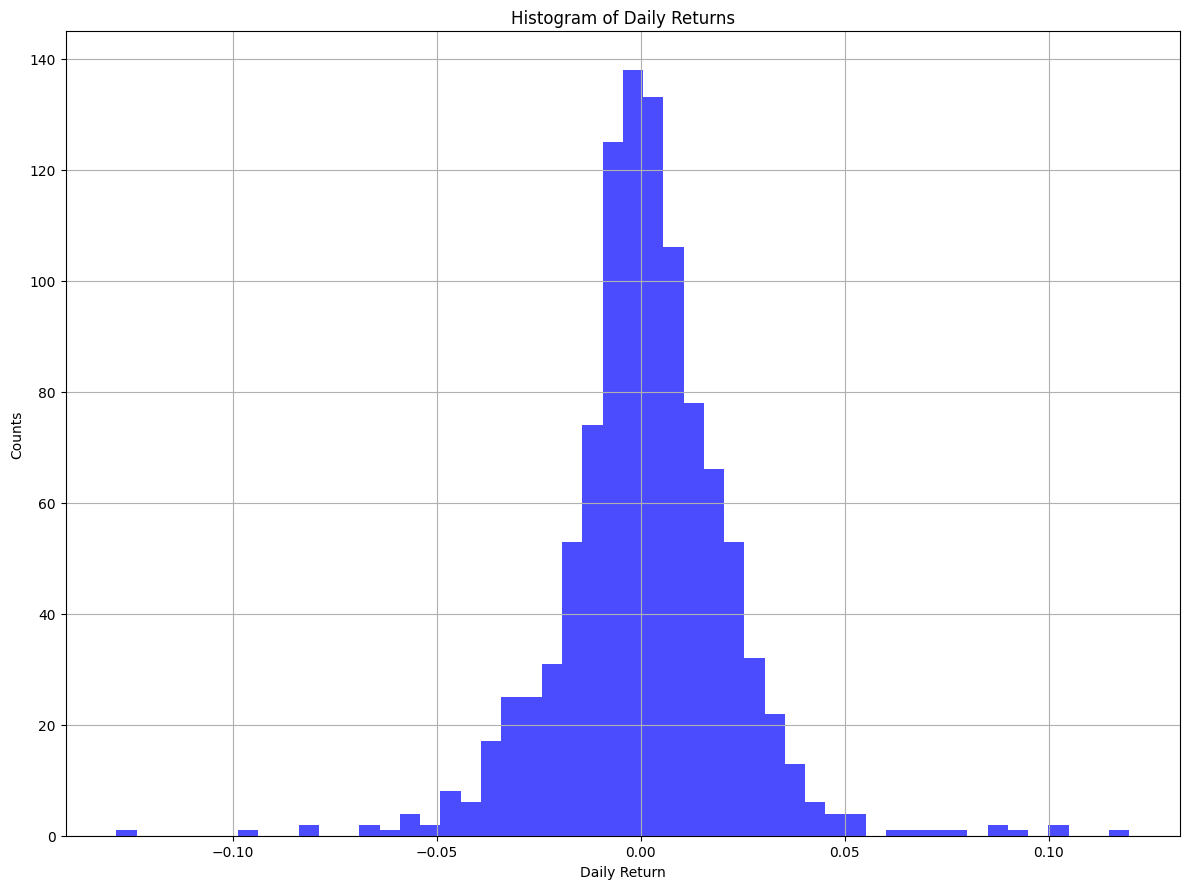

In [16]:
# Calculate the daily return percentage
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Create the histogram plot
plt.figure(figsize=(12, 9))

# Plot the histogram
stock_data['Daily Return'].hist(bins=50, color='blue', alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Histogram of Daily Returns')

# Adjust layout and display
plt.tight_layout()
plt.show()

### 📋 Training Data Preparation  
Extracted the **closing prices** and calculated the training dataset length as **95%** of the total data.  
📐📊  


In [17]:

data = stock_data.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

991

### 🔄 Data Normalization with MinMaxScaler  
Scaled the **closing price data** to a range of **0 to 1** using `MinMaxScaler`.  
🚀📉  


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.88881657],
       [0.90325132],
       [0.89022482]])

### 🛠️ Training Data Construction  
**Sequence Building**: Created training sets with 60-day sequences (`x_train`) and their next-day target values (`y_train`).   

Ready for time-series modeling! 📈🧠  



In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
       0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
       0.15996267, 0.16610632, 0.16230396, 0.16429316, 0.16698649,
       0.16536695, 0.14889013, 0.16427554, 0.17598183, 0.17515447,
       0.14987592, 0.14837961, 0.16631755, 0.17089446, 0.17751333,
       0.16839474, 0.17107045, 0.16765538, 0.18101645, 0.17691481,
       0.17705567, 0.16658159, 0.17471438, 0.16887002, 0.15610751,
       0.12993116, 0.11215165, 0.12019645, 0.08652102, 0.08623935,
       0.13104019, 0.11433452, 0.13795834, 0.12067178, 0.11382401,
       0.07358251, 0.10732832, 0.08988328, 0.04200187, 0.09435458,
       0.0314046 , 0.05015228, 0.03925573, 0.03592868, 0.00857291,
       0.        , 0.03962541, 0.03723134, 0.05997502, 0.04113931])]
[0.05358494912411915]

[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
       0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
       0.15996267, 0.16610632, 0.16

### 🌟 Crafting a Future-Ready LSTM Model  
🚀 Model Highlights:  
- Two LSTM Layers:  
  - 128 units (returning sequences for rich temporal data).  
  - 64 units (condensing the learned features).  
- Dense Layers: Fine-tuned with 25 neurons and a final output layer for predictions.  

🎯 Optimization & Training:  
- Compiled with the magic of Adam optimizer and precision-focused Mean Squared Error loss.  
- Lightning-fast training: 1 epoch, batch size = 1 for rapid prototyping.  

✨ Unleashing neural intelligence to forecast the future, one timestep at a time! 🌌📈  


In [20]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


931/931 ━━━━━━━━━━━━━━━━━━━━ 53s 52ms/step - loss: 0.0127


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


3.9038678166536056

### 🔍 Testing and Evaluation with LSTM  
- Testing Dataset Preparation:  
   Extracted data from the scaled dataset starting 60 timesteps before the test split.  
   Created `x_test` sequences and corresponding `y_test` labels from real closing prices.  

- Model Predictions:  
   Transformed test inputs using the trained LSTM model.  
   Scaled back predictions to original price values for interpretability.  

- Performance Metric:  
   Calculated Root Mean Squared Error (RMSE) to quantify prediction accuracy.  
   📉 A lower RMSE means closer alignment with actual prices!  

 


<ipython-input-22-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


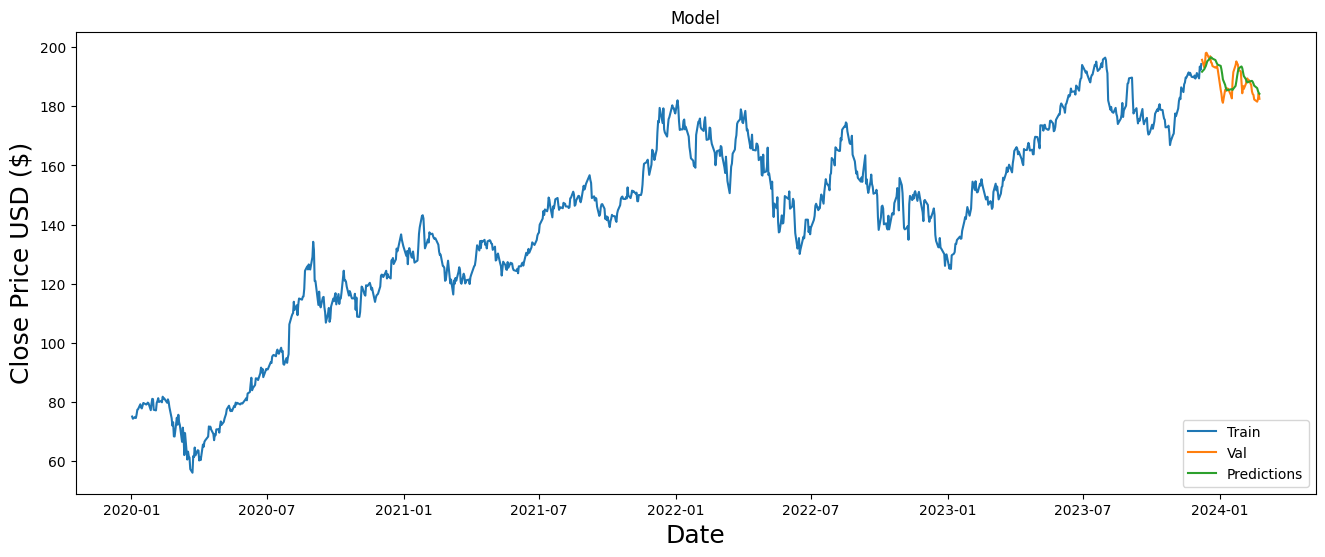

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


### ✅ Model Validation Check 


In [23]:
valid

,Close,Predictions
Date,,
2023-12-08,195.710007,191.692764
2023-12-11,193.179993,192.538757
2023-12-12,194.710007,193.078247
2023-12-13,197.960007,193.579132
2023-12-14,198.110001,194.377106
2023-12-15,197.570007,195.239059
2023-12-18,195.889999,195.963058
2023-12-19,196.940002,196.315598
2023-12-20,194.830002,196.552872
